***IMPORTING IMPORTANT LIBRARIES***

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from numpy import nan
from bs4 import BeautifulSoup    
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from math import sqrt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


***TRAINING AND TESTING***

In [0]:
train_data = pd.read_csv('train.tsv',sep='\t')
test_data = pd.read_csv('train.tsv',sep='\t')

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [0]:
train_data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


***CREATING A NEW COLUMN WITH THE SENTIMENT PHRASE COLUMN*** 

In [0]:
Sentiment_words=[]
for row in train_data['Sentiment']:
    if row ==0:
        Sentiment_words.append('negative')
    elif row == 1:
        Sentiment_words.append('neutral')
    elif row == 2:
        Sentiment_words.append('somewhat negative')
    elif row == 3:
        Sentiment_words.append('somewhat positive')
    elif row == 4:
        Sentiment_words.append('positive')
    else:
        Sentiment_words.append('Failed')
train_data['Sentiment_words'] = Sentiment_words

***COUNTING VALUES OF SENTIMENT PHRASE***

In [0]:
word_count=pd.value_counts(train_data['Sentiment_words'].values, sort=False)
word_count

positive              9206
negative              7072
somewhat positive    32927
neutral              27273
somewhat negative    79582
dtype: int64

***VISUALIZATION OF SENTIMENT PHRASE***

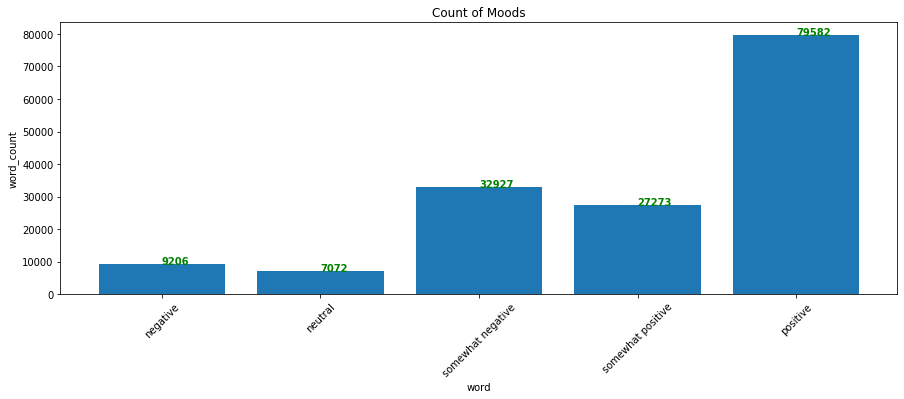

In [0]:
Index = [1,2,3,4,5]
plt.figure(figsize=(15,5))
plt.bar(Index,word_count,color = 'blue')
plt.xticks(Index,['negative','neutral','somewhat negative','somewhat positive','positive'],rotation=45)
plt.ylabel('word_count')
plt.xlabel('word')
plt.title('Count of Moods')
plt.bar(Index, word_count)
for a,b in zip(Index, word_count):
    plt.text(a, b, str(b) ,color='green', fontweight='bold')

***DATA CLEANING***

In [0]:
def review_to_words(raw_review): 
    review =raw_review
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    lemmatizer = WordNetLemmatizer()
    review = [lemmatizer.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return (' '.join(review))

***FUNCTION TO TRAIN AND TEST THE DATASET***

In [0]:
import nltk
nltk.download('wordnet')
  

corpus= []
for i in range(0, 156060):
    corpus.append(review_to_words(train_data['Phrase'][i]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
corpus1= []
for i in range(0, 156060):
    corpus1.append(review_to_words(train_data['Phrase'][i]))

***CREATING A NEW COLUMN AND MERGE IT WITH THE NEW CLEANING LIST***

In [0]:
train_data['new_Phrase']=corpus

***DROP THE OLD COLUMN***

In [0]:
train_data.drop(['Phrase'],axis=1,inplace=True)

In [0]:
train_data.head()

,PhraseId,SentenceId,Sentiment,Sentiment_words,new_Phrase
0,1,1,1,neutral,series escapade demonstrating adage good goose...
1,2,1,2,somewhat negative,series escapade demonstrating adage good goose
2,3,1,2,somewhat negative,series
3,4,1,2,somewhat negative,
4,5,1,2,somewhat negative,series


***SELECTING POSITIVE SENTIMENT FROM THE DATASET***

In [0]:
positive=train_data[train_data['Sentiment_words']==('positive')]

***DATA SPLITTING***

In [0]:
words = ' '.join(positive['new_Phrase'])
split_word = " ".join([word for word in words.split()])

***DATA VISUALIZATION***

In [0]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(split_word)

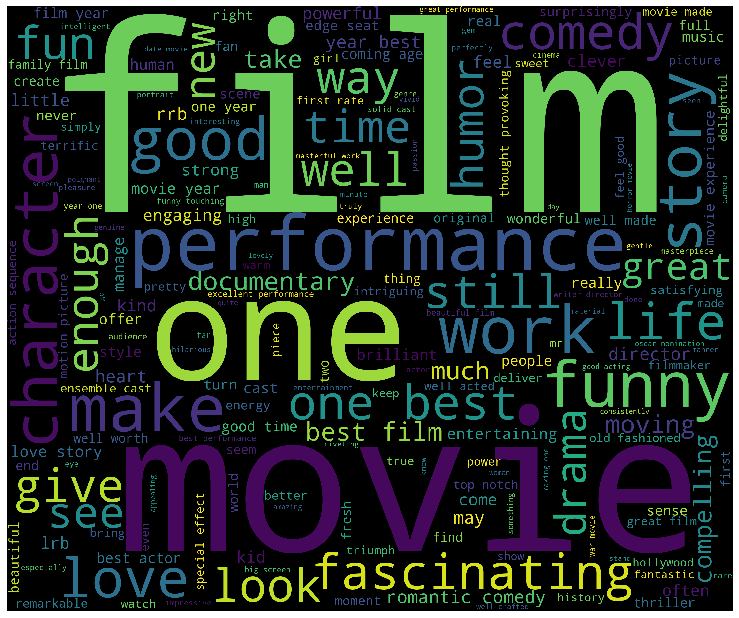

In [0]:
plt.figure(1,figsize=(13, 13))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


***COUNTING EVERY WORD IN POSITIVE SENTIMENT***

In [0]:
pos=positive['new_Phrase']

In [0]:
vectorizer = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)

In [0]:
pos_words = vectorizer.fit_transform(pos)

In [0]:
pos_words = pos_words.toarray()

In [0]:
pos= vectorizer.get_feature_names()

In [0]:
pos

['ability',
 'able',
 'absolute',
 'absolutely',
 'absorbing',
 'accept',
 'accessible',
 'acclaim',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishment',
 'accurate',
 'achievement',
 'achieves',
 'achingly',
 'across',
 'act',
 'acted',
 'acting',
 'action',
 'actor',
 'actress',
 'actually',
 'acute',
 'adam',
 'adaptation',
 'add',
 'addition',
 'admirable',
 'admire',
 'adorably',
 'adorns',
 'adrenalin',
 'adrenaline',
 'adult',
 'adventure',
 'adventurous',
 'aerial',
 'affecting',
 'affection',
 'affirming',
 'affirms',
 'age',
 'agenda',
 'aggrandizing',
 'ago',
 'ahead',
 'aimed',
 'air',
 'alike',
 'alive',
 'allegory',
 'allen',
 'allows',
 'alluring',
 'almost',
 'alone',
 'along',
 'also',
 'alternately',
 'always',
 'amazing',
 'amazingly',
 'ambiguity',
 'ambitious',
 'america',
 'american',
 'among',
 'amount',
 'amused',
 'amusing',
 'anchor',
 'anderson',
 'angst',
 'animal',
 'animated',
 'animation',
 'anime',
 'another',
 'answer',
 'antic',
 'anybod

In [0]:
print (pos_words.shape)

(9206, 2000)


In [0]:
dist = np.sum(pos_words, axis=0)
for tag, count in zip(pos, dist):
    print (tag,count)

ability 20
able 32
absolute 9
absolutely 24
absorbing 18
accept 10
accessible 16
acclaim 9
accomplish 5
accomplished 23
accomplishes 7
accomplishment 17
accurate 9
achievement 30
achieves 5
achingly 7
across 12
act 29
acted 43
acting 101
action 93
actor 130
actress 14
actually 45
acute 8
adam 7
adaptation 22
add 17
addition 13
admirable 16
admire 7
adorably 7
adorns 7
adrenalin 6
adrenaline 6
adult 35
adventure 54
adventurous 17
aerial 7
affecting 9
affection 11
affirming 10
affirms 5
age 84
agenda 7
aggrandizing 7
ago 9
ahead 10
aimed 5
air 10
alike 5
alive 20
allegory 7
allen 15
allows 19
alluring 7
almost 50
alone 8
along 29
also 88
alternately 6
always 43
amazing 35
amazingly 11
ambiguity 6
ambitious 18
america 18
american 63
among 19
amount 16
amused 9
amusing 57
anchor 6
anderson 6
angst 10
animal 10
animated 28
animation 24
anime 6
another 43
answer 11
antic 7
anybody 5
anyone 35
anything 31
apart 8
apex 5
aplomb 11
apocalypse 8
apparent 6
appeal 15
appealing 27
appear 8
appreci

In [0]:
postive_new= pd.DataFrame(dist)

In [0]:
postive_new.columns=['word_count']

In [0]:
postive_new['word'] = pd.Series(pos, index=postive_new.index)

In [0]:
postive_new1=postive_new[['word','word_count']]

In [0]:
postive_new1.head()

,word,word_count
0,ability,20
1,able,32
2,absolute,9
3,absolutely,24
4,absorbing,18


In [0]:
top_30_words=postive_new1.sort_values(['word_count'],ascending=[0])

In [0]:
top_30_words.head(30)

,word,word_count
652,film,1104
1149,movie,757
1223,one,517
1280,performance,472
161,best,394
715,funny,347
760,good,339
1933,well,317
1672,story,280
1990,year,275


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
x__train = cv.fit_transform(corpus).toarray()
x__test= cv.fit_transform(corpus1).toarray()
y = train_data.iloc[:, 2].values

***PREDICTION***

***USING MULTINOMIAL NAIVE BAYES***

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x__train, y, test_size = 0.40, random_state = 0)

from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_real_pred = classifier.predict(x__test)

**CALCULATING MEAN SQUARE ERROR**

In [0]:
mse = ((y_pred - y_test) ** 2).mean()

mse

0.6473792131231577

***CALCULATING ROOT MEAN SQUARE ERROR***

In [0]:
rmse = sqrt(mse)

rmse

0.8045987901576522